# IT5005 Artificial Intelligence Term Assignment

Fill your name and student number below:


| Student Number: | Name:                   |
|:----------------|:------------------------|
| A0286970M      | Wu Xiangjiekang           |




## 1. Introduction

In this assignment we hope to achieve the following:

    1. An understanding of the practical limitations of using dense networks in complex tasks
    2. Hands-on experience in building a deep learning neural network to solve a relatively complex task.
    
As this lab is more challenging than the tutorial, you can choose to work in teams of 2.

Each step may take a long time to run. You and your partner may want to work out how to do things simultaneously, but please do not miss out on any learning opportunities.


## 2. Submission Instructions


### 2.1 SUBMISSION INSTRUCTIONS

#### If you are working with a partner only ONE submission is required. However please ensure that both names are shown above. Otherwise one person will not get any marks.

Please rename this Jupyter notebook to your student ID (e.g. A1234567Y.ipynb), complete it and submit to Canvas by 12 pm, Sunday 21 April 2024.

The folder will close shortly after 12 pm on 21 April, after which you will no longer be able to submit your assignment and you will get 0.


## 3. Creating a Dense Network for CIFAR-10

We will now begin building a neural network for the CIFAR-10 dataset. The CIFAR-10 dataset consists of 50,000 32x32x3 (32x32 pixels, RGB channels) training images and 10,000 testing images (also 32x32x3), divided into the following 10 categories:

    1. Airplane
    2. Automobile
    3. Bird
    4. Cat
    5. Deer
    6. Dog
    7. Frog
    8. Horse
    9. Ship
    10. Truck
    
In the first two parts of this lab we will create a classifier for the CIFAR-10 dataset.

### 3.1 Loading the Dataset

We begin firstly by creating a Dense neural network for CIFAR-10. The code below shows how we load the CIFAR-10 dataset:


In [1]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

def load_cifar10():
    (train_x, train_y), (test_x, test_y) = cifar10.load_data()
    train_x = train_x.reshape(train_x.shape[0], 3072) # Question 1
    test_x = test_x.reshape(test_x.shape[0], 3072) # Question 1
    train_x = train_x.astype('float32')
    test_x = test_x.astype('float32')
    train_x /= 255.0
    test_x /= 255.0
    ret_train_y = to_categorical(train_y,10)
    ret_test_y = to_categorical(test_y, 10)
    
    return (train_x, ret_train_y), (test_x, ret_test_y)


(train_x, train_y), (test_x, test_y) = load_cifar10()

----

#### Question 1

Explain what the following two  statements do, and where the number "3072" came from (2 MARKS):

```
  train_x = train_x.reshape(train_x.shape[0], 3072) # Question 1
  test_x = test_x.reshape(test_x.shape[0], 3072) # Question 1
```

***ANSWER: The number "3072" comes from the dimensions of the images in the CIFAR-10 dataset, each dimension is multiplied: 32 pixels (width) x 32 pixels (height) x 3 color channels = 3072.**

*FOR GRADER: _______ / 2*

### 3.2 Building the MLP Classifier

In the code box below, create a new fully connected (dense) multilayer perceptron classifier for the CIFAR-10 dataset. To begin with, create a network with one hidden layer of 1024 neurons, using the SGD optimizer. You should output the training and validation accuracy at every epoch, and train for 50 epochs:


Epoch 1/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.8531 - accuracy: 0.3389 - val_loss: 1.7663 - val_accuracy: 0.3714
Epoch 2/100
1563/1563 [==============================] - 14s 9ms/step - loss: 1.6737 - accuracy: 0.4121 - val_loss: 1.6823 - val_accuracy: 0.4008
Epoch 3/100
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5967 - accuracy: 0.4405 - val_loss: 1.5999 - val_accuracy: 0.4280
Epoch 4/100
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5417 - accuracy: 0.4622 - val_loss: 1.5240 - val_accuracy: 0.4637
Epoch 5/100
1563/1563 [==============================] - 15s 10ms/step - loss: 1.5007 - accuracy: 0.4760 - val_loss: 1.5746 - val_accuracy: 0.4473
Epoch 6/100
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4651 - accuracy: 0.4909 - val_loss: 1.5850 - val_accuracy: 0.4395
Epoch 7/100
1563/1563 [==============================] - 15s 10ms/step - loss: 1.4323 - accuracy: 0.5002 - val_loss: 1.480

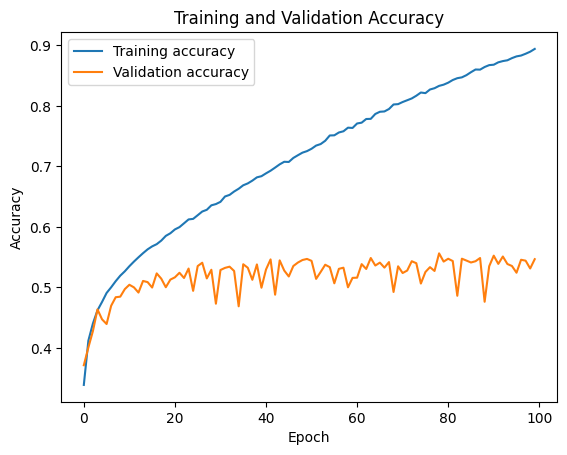

In [4]:
""" 
Write your code to build an MLP with one hidden layer of 1024 neurons,
with an SGD optimizer. Train for 100 epochs, and output the training and
validation accuracy at each epoch.
"""
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Create the MLP model
model = Sequential([
    Dense(1024, activation='relu', input_shape=(3072,)),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=SGD(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model
history = model.fit(train_x, train_y, epochs=100, batch_size=32, 
                    validation_data=(test_x, test_y), verbose=1)

# Output training and validation accuracy at each epoch
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Question 2

Complete the following table on the design choices for your MLP 
(3 MARKS):

| Hyperparameter       | What I used | Why?                  |
|:---------------------|:------------|:----------------------|
| Optimizer            | SGD         | Specified in question |
| # of hidden layers   | 1           | Specified in question |
| # of hidden neurons  | 1024        | Specified in question |
| Hid layer activation | ReLU            | Helps avoid vanishing gradient problems and speeds up training.                      |
| # of output neurons  | 10            | Matches the number of classes in CIFAR-10 dataset.                      |
| Output activation    | Softmax            | Softmax is suitable for multi-class classification, providing probabilities for each class.                      |
| learning_rate        | Default of SGD 0.01           | Typical choice for initial experiments;                      |
| momentum             | Default of SGD 0.0           | Momentum is not altered unless specified; helps in faster convergence.                      |
| decay                | Default of SGD 0.0           | Learning rate decay not specified; it would help in stabilizing learning as training progresses.                      |
| loss                 | Categorical Crossentropy            | Suitable for multi-class classification problems where classes are mutually exclusive.                      |

*For TA: ___ / 3* <br>
*Code:  ____/ 5* <br>
**TOTAL: ____ / 8** <br>

#### Question 3:

What was your final training accuracy? Validation accuracy? Is there overfitting / underfitting? Explain your answer (5 MARKS)

***The model exhibits overfitting, as evidenced by a high training accuracy of 89.42% and a significantly lower validation accuracy of 54.67% after 100 epochs. While the model effectively learns the training data, the substantial gap between training and validation performance indicates it does not generalize well to new data.***

*FOR GRADER: ______ / 5*

### 3.3 Experimenting with the MLP

Cut and paste your code from Section 3.2 to the box below (you may need to rename your MLP). Experiment with the number of hidden layers, the number of neurons in each hidden layer, the optimization algorithm, etc. See [Keras Optimizers](https://keras.io/optimizers) for the types of optimizers and their parameters. **Train for 100 epochs.**


Epoch 1/100
782/782 [==============================] - 36s 45ms/step - loss: 1.9209 - accuracy: 0.3381 - val_loss: 2.1279 - val_accuracy: 0.2958 - lr: 0.0010
Epoch 2/100
782/782 [==============================] - 35s 45ms/step - loss: 1.6728 - accuracy: 0.4055 - val_loss: 1.8582 - val_accuracy: 0.3445 - lr: 0.0010
Epoch 3/100
782/782 [==============================] - 36s 46ms/step - loss: 1.5948 - accuracy: 0.4306 - val_loss: 1.7486 - val_accuracy: 0.3578 - lr: 0.0010
Epoch 4/100
782/782 [==============================] - 36s 46ms/step - loss: 1.5356 - accuracy: 0.4505 - val_loss: 1.7780 - val_accuracy: 0.3813 - lr: 0.0010
Epoch 5/100
782/782 [==============================] - 35s 45ms/step - loss: 1.4952 - accuracy: 0.4655 - val_loss: 1.4889 - val_accuracy: 0.4738 - lr: 0.0010
Epoch 6/100
782/782 [==============================] - 36s 46ms/step - loss: 1.4685 - accuracy: 0.4753 - val_loss: 1.6106 - val_accuracy: 0.4158 - lr: 0.0010
Epoch 7/100
782/782 [==============================]

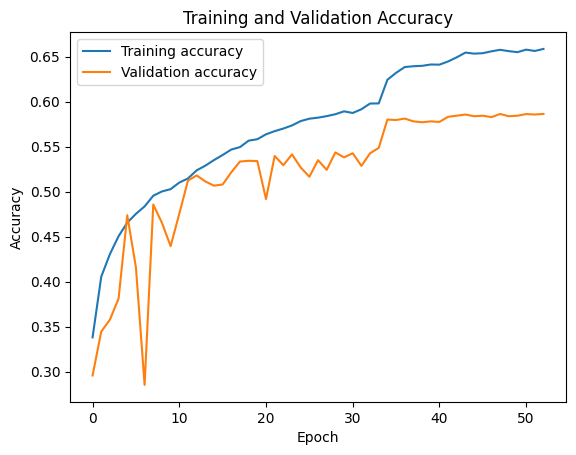

In [14]:
"""
Cut and paste your code from Section 3.2 below, then modify it to get
much better results than what you had earlier. E.g. increase the number of
nodes in the hidden layer, increase the number of hidden layers,
change the optimizer, etc. 

Train for 100 epochs.

"""
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001, verbose=1)

# Create the MLP model with Batch Normalization
model = Sequential([
    Dense(2048, input_shape=(3072,), activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1024, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model with callbacks
history = model.fit(train_x, train_y, epochs=100, batch_size=64,
                    validation_data=(test_x, test_y),
                    verbose=1, callbacks=[early_stopping, reduce_lr])

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 58ms/step - accuracy: 0.3676 - loss: 1.7220 - val_accuracy: 0.5546 - val_loss: 1.2146 - learning_rate: 0.0010
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.5834 - loss: 1.1709 - val_accuracy: 0.6179 - val_loss: 1.0773 - learning_rate: 0.0010
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.6503 - loss: 0.9964 - val_accuracy: 0.6700 - val_loss: 0.9515 - learning_rate: 0.0010
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.6992 - loss: 0.8621 - val_accuracy: 0.6808 - val_loss: 0.9088 - learning_rate: 0.0010
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.7307 - loss: 0.7674 - val_accuracy: 0.6960 - val_loss: 0.8870 - learning_rate: 0.0010
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.7562 - loss: 0.6958 - val_accuracy: 0.6950 - val_loss: 0.8766 - learning_rate: 0.0010
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.7

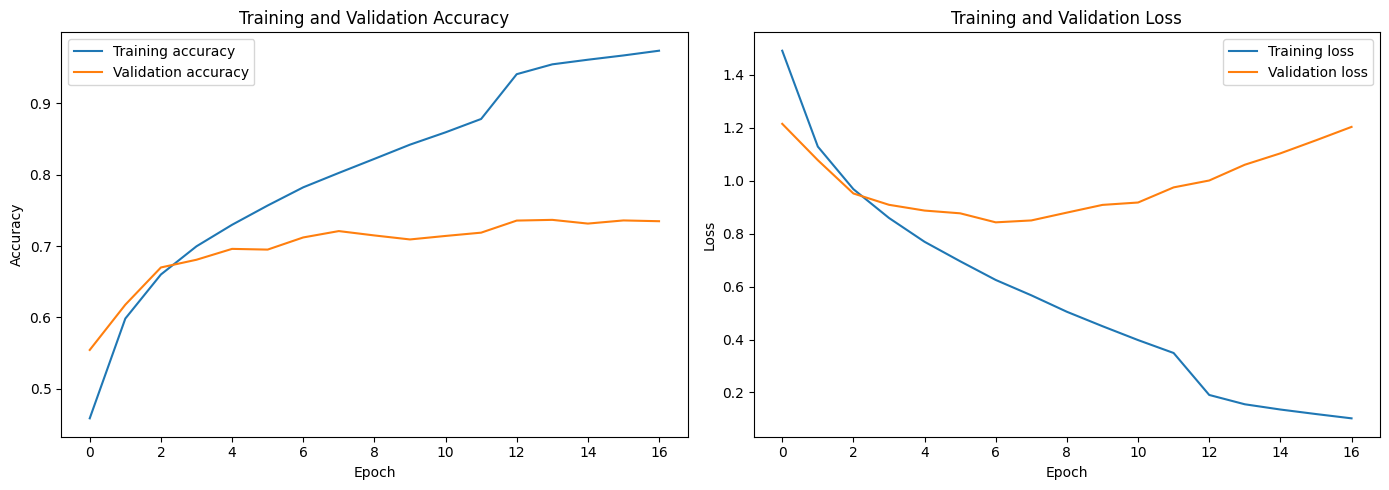

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Create the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Use the same callbacks as before
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001, verbose=1)

# Adjust the input data shape and format if necessary
train_x = train_x.reshape(-1, 32, 32, 3)
test_x = test_x.reshape(-1, 32, 32, 3)

# Train the model with callbacks
history = model.fit(train_x, train_y, epochs=100, batch_size=64,
                    validation_data=(test_x, test_y),
                    verbose=1, callbacks=[early_stopping, reduce_lr])
# Plot training and validation accuracy
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

----

#### Question 4:

Complete the following table with your final design (you may add more rows for the # neurons (layer1) etc. to detail how many neurons you have in each hidden layer). Likewise you may replace the learning_rate, momentum etc rows with parameters more appropriate to the optimizer that you have chosen. (3 MARKS)


| Hyperparameter       | What I used | Why?                  |
|:---------------------|:------------|:----------------------|
| Optimizer            | Adam            | Adam is chosen for its efficiency in handling sparse gradients on noisy problems, like image claasification. It dynamically adjusts the learning rate, which can lead to faster convergence compared to SGD.                      |
| # of Convolutional layers   | 3           | Three convolutional layers are used to enable the model to learn hierarchical feature representations from the image data, capturing both low-level and high-level features.                      |
| Fliters in Conv Layer1    | 32            | Starting with 32 filters allows the model to capture various spatial features form the input images ay the initial layer.                      |
| Activation for Conv Layers| ReLU            | ReLU is preferred for its ability to introduce non-linearity without affecting the gradients much, which helps in avoiding the vanishing gradient problem during deep network training.                      |
| Filters in Conv Layer2    | 64            | Increase the capacity of the model to capture more complex features as the depth increases, essential for handling the complexity of images in CIFAR-10.                     |
| Filters in Conv Layer3| 128            | Further increases the depth and the ability to capture even more complex patterns, suitable for the detailed features in CIFAR-10 images                      |
| Dense Layer Neurons  | 128            | A fully connected layers with 128 neurons to compile the features extracted by convolutional layers into predictions                      |
| Output Layer Neurons    | 10            | Matches the number of class categories in the CIFAR-10 dataset, allowing the model to classify inpit images into one of the ten categories.                      |
| Output Activation        | Softmax            | Softmax is appropriate for multi-class classification tasks like CIFAR-10 as it provides a probability distribution among the categorical classes.                      |
| Learning Rate             | 0.001            | A moderate learning rate to ensure effective learning without causing the weights to converge too rapidly or inadequately.                      |
| Loss Function                | Categorical Crossentropy            | Suitable for multi-class classification problems, where it calculates the difference between predicted probabilities and the actual distribution.                      |


*FOR GRADER: _____ / 3 * <br>
*CODE: ______ / 5 *<br>

***TOTAL: ______ / 8***

#### Question 5

What is the final training and validation accuracy that you obtained after 100 epochs? Is there considerable improvement over Section 3.2? Are there still signs of underfitting or overfitting? Explain your answer (5 MARKS)

***After 100 epochs, the model achieved a training accuracy of 97.52%, and a validation accuracy of 73.47%, showing significant improvement over Section 3.2. While these results demonstrate enhanced performance, specifically in validation accuracym there is a considerable gap between training and validation metrics, suggesting overfitting. The model performs exceptionally on training data but does not generalizas as effectively on unseen data, indicate that while it has learned the training data intricacies, it may not predict as accurately on new data.***

*FOR GRADER: ______ / 5 *

#### Question 6

Write a short reflection on the practical difficulties of using a dense MLP to classsify images in the CIFAR-10 datasets. (3 MARKS)

***Using a dense MLP for classifying CIFAR-10 images presents challenges primarily due to the high dimensionality of the input data, which necessitates a large number of parameters, increasing the risk of overfitting. Additionally, MLPs do not capture the spatial hierarchies and local patterns in images as effectively as convolutional layers, which are better suited for image data. Flattening image data to fit MLPs also results in a loss of spatial context and increases computational complexity. Consequently, while MLPs can classify images, they are less efficient and effective compared to convolutional neural networks (CNNs), which reduce parameter counts and computational load through weight sharing and pooling, making them more appropriate for complex image datasets like CIFAR-10.***

*FOR GRADER: _______ /3*

----

## 4. Creating a CNN for the MNIST Data Set

In this section we will now create a convolutional neural network (CNN) to classify images in the MNIST dataset that we used in the previous lab. Let's go through each part to see how to do this.

### 4.1 Loading the MNIST Dataset

As always we will load the MNIST dataset, scale the inputs to between 0 and 1, and convert the Y labels to one-hot vectors. However unlike before we will not flatten the 28x28 image to a 784 element vector, since CNNs can inherently handle 2D data.dle 2D data.

In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

def load_mnist():
    (train_x, train_y),(test_x, test_y) = mnist.load_data()
    train_x = train_x.reshape(train_x.shape[0], 28, 28, 1)
    test_x = test_x.reshape(test_x.shape[0], 28, 28, 1)

    train_x=train_x.astype('float32')
    test_x = test_x.astype('float32')
    
    train_x /= 255.0
    test_x /= 255.0
        
    train_y = to_categorical(train_y, 10)
    test_y = to_categorical(test_y, 10)
        
    return (train_x, train_y), (test_x, test_y) 

### 4.2 Building the CNN

We will now build the CNN. Unlike before we will create a function to produce the CNN. We will also look at how to save and load Keras models using "checkpoints", particularly "ModelCheckpoint" that saves the model each epoch.

Let's begin by creating the model. We call os.path.exists to see if a model file exists, and call "load_model" if it does. Otherwise we create a new model.



In [4]:
# load_model loads a model from a hd5 file.
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import os

MODEL_NAME = 'mnist-cnn.hd5'

def buildmodel(model_name):
    if os.path.exists(model_name):
        model = load_model(model_name)                                                                                             
    else:
        model = Sequential()
        model.add(Conv2D(32, kernel_size=(5,5),
        activation='relu',
        input_shape=(28, 28, 1), padding='same')) # Question 7

        model.add(MaxPooling2D(pool_size=(2,2), strides=2)) # Question 8
        model.add(Conv2D(64, kernel_size=(5,5), activation='relu'))
        model.add(Conv2D(128, kernel_size=(5,5), activation='relu'))
        model.add(Conv2D(64, kernel_size=(5,5), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2,2), strides=2))
        model.add(Flatten()) # Question 9
        model.add(Dense(1024, activation='relu'))
        model.add(Dropout(0.1))
        model.add(Dense(10, activation='softmax'))

    return model



----

#### Question 7

The first layer in our CNN is a 2D convolution kernel, shown here:

```
        model.add(Conv2D(32, kernel_size=(5,5),
        activation='relu',
        input_shape=(28, 28, 1), padding='same')) # Question 7
```

Why is the input_shape set to (28, 28, 1)? What does this mean? What does "padding = 'same'" mean? (4 MARKS)

***The input shape parameter in the Conv2D layer is set to (28,28,1) to match the shape of the images in the MNIST dataset. The first two dimenstions (28,28) represent the height and width of the images, while the last  dimension (1) indicates that the images are in grayscale, meaning there is only one channel. The padding="same" specifies that the convolution operation should add padding to the input image border to ensure that the output of the convolution has the same spatial dimensions as the input.***

*FOR GRADER: ______ / 4*

#### Question 8

The second layer is the MaxPooling2D layer shown below:

```
        model.add(MaxPooling2D(pool_size=(2,2), strides=2)) # Question 8
```

What other types of pooling layers are available? What does 'strides = 2' mean? (3 MARKS)

***Some other pooling layers available includes Average Pooling, Global Max Pooling, Global Average Pooling, the stride=2 parameter in the MaxPooling2D layer specifies that the pooling window will move 2 pixels across and 2 pixels down for each step it taks over the input.***

*FOR GRADER: _____ / 3*


#### Question 9

What does the "Flatten" layer here do? Why is it needed?

```
        model.add(Flatten()) # Question 9
```

***The "Flatten" layer in a convolutional neural network transforms the multi-dimensional output of the preceding layers into one-dimensional array. This transformation is necessary because the subsequent dense layer require their input to be single vector of values.***

*FOR GRADER: ____ / 2*




----

### 4.3 Training the CNN

Let's now train the CNN. In this example we introduce the idea of a "callback", which is a routine that Keras calls at the end of each epoch. Specifically we look at two callbacks:

    1. ModelCheckpoint: When called, Keras saves the model to the specified filename.
    
    2. EarlyStopping: When called, Keras checks if it should stop the training prematurely.
    

Let's look at the code to see how training is done, and how callbacks are used.

In [5]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

def train(model, train_x, train_y, epochs, test_x, test_y, model_name):

    model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.7), 
                  loss='categorical_crossentropy', metrics=['accuracy'])

    savemodel = ModelCheckpoint(model_name)
    stopmodel = EarlyStopping(min_delta=0.001, patience=10) # Question 10

    print("Starting training.")

    model.fit(x=train_x, y=train_y, batch_size=32,
    validation_data=(test_x, test_y), shuffle=True,
    epochs=epochs, 
    callbacks=[savemodel, stopmodel])

    print("Done. Now evaluating.")
    loss, acc = model.evaluate(x=test_x, y=test_y)
    print("Test accuracy: %3.2f, loss: %3.2f"%(acc, loss))

Notice that there isn't very much that is unusual going on; we compile the model with our loss function and optimizer, then call fit, and finally evaluate to look at the final accuracy for the test set.  The only thing unusual is the "callbacks" parameter here in the fit function call

```
    model.fit(x=train_x, y=train_y, batch_size=32,
    validation_data=(test_x, test_y), shuffle=True,
    epochs=epochs, 
    callbacks=[savemodel, stopmodel])
```

----

#### Question 10.

What does do the min_delta and patience parameters do in the EarlyStopping callback, as shown below? (2 MARKS)

```
    stopmodel = EarlyStopping(min_delta=0.001, patience=10) # Question 10
```

---
***min_delta: This parameter sets the minimim change in the monitored quantity to quanlify as an improvement. In this case, min_delta=0.001 means that the monitored quantity must decrease by at lease 0.001 from one epoch to the next for it to be considered an improvement.***
***patience: This parameter specifies the number of epochs with no imporvement after which training will be stopped. Setting patience=10 means that if there is no improvement after 10 consecutive epochs, the training process will halt.***

### 4.4 Putting it together.

Now let's run the code and see how it goes (Note: To save time we are training for only 5 epochs; we should train much longer to get much better results):

In [6]:
    (train_x, train_y),(test_x, test_y) = load_mnist()
    model = buildmodel(MODEL_NAME)
    train(model, train_x, train_y, 5, test_x, test_y, MODEL_NAME)
    

11490434/11490434 [==============================] - 2s 0us/step
Starting training.
Epoch 1/5
1873/1875 [============================>.] - ETA: 0s - loss: 0.3494 - accuracy: 0.8873

INFO:tensorflow:Assets written to: mnist-cnn.hd5\assets


INFO:tensorflow:Assets written to: mnist-cnn.hd5\assets


1875/1875 [==============================] - 45s 23ms/step - loss: 0.3491 - accuracy: 0.8874 - val_loss: 0.0697 - val_accuracy: 0.9780
Epoch 2/5
1874/1875 [============================>.] - ETA: 0s - loss: 0.0700 - accuracy: 0.9783

INFO:tensorflow:Assets written to: mnist-cnn.hd5\assets


INFO:tensorflow:Assets written to: mnist-cnn.hd5\assets


1875/1875 [==============================] - 48s 26ms/step - loss: 0.0700 - accuracy: 0.9783 - val_loss: 0.0436 - val_accuracy: 0.9868
Epoch 3/5
1874/1875 [============================>.] - ETA: 0s - loss: 0.0463 - accuracy: 0.9856

INFO:tensorflow:Assets written to: mnist-cnn.hd5\assets


INFO:tensorflow:Assets written to: mnist-cnn.hd5\assets


1875/1875 [==============================] - 47s 25ms/step - loss: 0.0463 - accuracy: 0.9856 - val_loss: 0.0422 - val_accuracy: 0.9865
Epoch 4/5
1875/1875 [==============================] - ETA: 0s - loss: 0.0349 - accuracy: 0.9887

INFO:tensorflow:Assets written to: mnist-cnn.hd5\assets


INFO:tensorflow:Assets written to: mnist-cnn.hd5\assets


1875/1875 [==============================] - 47s 25ms/step - loss: 0.0349 - accuracy: 0.9887 - val_loss: 0.0317 - val_accuracy: 0.9895
Epoch 5/5
1873/1875 [============================>.] - ETA: 0s - loss: 0.0272 - accuracy: 0.9914

INFO:tensorflow:Assets written to: mnist-cnn.hd5\assets


INFO:tensorflow:Assets written to: mnist-cnn.hd5\assets


1875/1875 [==============================] - 46s 24ms/step - loss: 0.0273 - accuracy: 0.9914 - val_loss: 0.0323 - val_accuracy: 0.9896
Done. Now evaluating.
313/313 [==============================] - 2s 7ms/step - loss: 0.0323 - accuracy: 0.9896
Test accuracy: 0.99, loss: 0.03


----

#### Question 11.

Compare the relative advantages and disadvantages of CNN vs. the Dense MLP that you build in sections 3.2 and 3.3. What makes CNNs better (or worse)? (3 MARKS)

***CNNs offer distinct advantages over Dense MLPs for image classification due to their ability to preserve spatial hierachies and utilize fewer parameters through shared weights, which enhances generalization. They capture local features efficiently via convolution operations, make them well-suited for tasks that involve visual patterns. However CNNs are computationally intensive, requiring robust hardware for training, and can still overfit if not regularized properly. In contrast, Desen MLPs, by flattening image data, lose critical spatial relationships, necessitating a higher parameter count to achieve comparable performance, which can increase risk of overfitting.***

*FOR TA: ______ / 3*

## 5. Making a CNN for the CIFAR-10 Dataset

Now comes the fun part: Using the example above for creating a CNN for the MNIST dataset, now create a CNN in the box below for the MNIST-10 dataset. At the end of each epoch save the model to a file called "cifar.hd5" (note: the .hd5 is added automatically for you).

---

#### Question 12.

Summarize your design in the table below (the actual coding cell comes after this):

| Hyperparameter       | What I used | Why?                  |
|:---------------------|:------------|:----------------------|
| Optimizer            |  Adam           | Provides an adaptive learning rate that helps converge faster.                     |
| Input shape          | (32,32,3)            | Matches the 32*32 RGB images in CIFAR-10.                      |
| First layer          | Con2D(32, (3,3), activation="relu")          | Helps to extract low-level features from the image.                      |
| Second layer         | MaxPooling2D((2,2))           | Reduces spatial dimensions, which helps in reducing computation.                      |
| Addtional layers      | Conv2D(64, (3,3), activation='relu') followed by MaxPooling2D((2,2)) and another Conv2D layer with 128 filters           | Increases the network's depth to capture more complex features.                      |
| Dense layer           | Dense(512, activation='relu')            | High number of units to learn high-level features.                      |
| Output layer          | 	Dense(10, activation='softmax')            | Matches the 10 classes of CIFAR-10 for multi-class classification.                      |


*FOR TA:*
*Table: ________ / 3* <br>
*Code: _________/ 7* <br>
**TOTAL: _______ / 10** <br>

---

***TOTAL: _______ / 55***

In [7]:
"""
Write your code for your CNN for the CIFAR-10 dataset here. 

Note: train_x, train_y, test_x, test_y were changed when we called 
load_mnist in the previous section. You will now need to call load_cifar10
again.

"""
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.datasets import cifar10
from keras.utils import to_categorical

def load_cifar10():
    (train_x, train_y), (test_x, test_y) = cifar10.load_data()
    train_x = train_x.astype('float32') / 255
    test_x = test_x.astype('float32') / 255
    train_y = to_categorical(train_y, 10)
    test_y = to_categorical(test_y, 10)
    return train_x, train_y, test_x, test_y

train_x, train_y, test_x, test_y = load_cifar10()

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

checkpoint = ModelCheckpoint('cifar.hd5', save_best_only=True)
model.fit(train_x, train_y, epochs=10, validation_data=(test_x, test_y), callbacks=[checkpoint])


Epoch 1/10
1560/1563 [============================>.] - ETA: 0s - loss: 1.4137 - accuracy: 0.4868

INFO:tensorflow:Assets written to: cifar.hd5\assets


INFO:tensorflow:Assets written to: cifar.hd5\assets


1563/1563 [==============================] - 32s 20ms/step - loss: 1.4133 - accuracy: 0.4869 - val_loss: 1.1360 - val_accuracy: 0.5910
Epoch 2/10
1562/1563 [============================>.] - ETA: 0s - loss: 1.0314 - accuracy: 0.6333

INFO:tensorflow:Assets written to: cifar.hd5\assets


INFO:tensorflow:Assets written to: cifar.hd5\assets


1563/1563 [==============================] - 32s 21ms/step - loss: 1.0314 - accuracy: 0.6333 - val_loss: 0.9609 - val_accuracy: 0.6607
Epoch 3/10
1560/1563 [============================>.] - ETA: 0s - loss: 0.8572 - accuracy: 0.6973

INFO:tensorflow:Assets written to: cifar.hd5\assets


INFO:tensorflow:Assets written to: cifar.hd5\assets


1563/1563 [==============================] - 33s 21ms/step - loss: 0.8572 - accuracy: 0.6972 - val_loss: 0.9251 - val_accuracy: 0.6752
Epoch 4/10
1563/1563 [==============================] - ETA: 0s - loss: 0.7406 - accuracy: 0.7384

INFO:tensorflow:Assets written to: cifar.hd5\assets


INFO:tensorflow:Assets written to: cifar.hd5\assets


1563/1563 [==============================] - 33s 21ms/step - loss: 0.7406 - accuracy: 0.7384 - val_loss: 0.8780 - val_accuracy: 0.7020
Epoch 5/10
1562/1563 [============================>.] - ETA: 0s - loss: 0.6289 - accuracy: 0.7772

INFO:tensorflow:Assets written to: cifar.hd5\assets


INFO:tensorflow:Assets written to: cifar.hd5\assets


1563/1563 [==============================] - 33s 21ms/step - loss: 0.6289 - accuracy: 0.7772 - val_loss: 0.8400 - val_accuracy: 0.7243
Epoch 6/10
1561/1563 [============================>.] - ETA: 0s - loss: 0.5226 - accuracy: 0.8149

INFO:tensorflow:Assets written to: cifar.hd5\assets


INFO:tensorflow:Assets written to: cifar.hd5\assets


1563/1563 [==============================] - 33s 21ms/step - loss: 0.5227 - accuracy: 0.8149 - val_loss: 0.8386 - val_accuracy: 0.7208
Epoch 7/10
1563/1563 [==============================] - 32s 21ms/step - loss: 0.4301 - accuracy: 0.8473 - val_loss: 0.8942 - val_accuracy: 0.7268
Epoch 8/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.3405 - accuracy: 0.8799 - val_loss: 1.0209 - val_accuracy: 0.7084
Epoch 9/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.2655 - accuracy: 0.9061 - val_loss: 1.0879 - val_accuracy: 0.7166
Epoch 10/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.2119 - accuracy: 0.9243 - val_loss: 1.2498 - val_accuracy: 0.7041
